In [1]:
import os
import tensorflow.keras as keras

os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from tensorflow.keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25
BATCH_SIZE = 1024 

In [7]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

reduce_lr_factor = [0.1, 0.5, 0.9]
redice_lr_patient = [3, 5, 7]

In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience=reduce_patient, 
                                  verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.10, reduce_patient: 3
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
bat

50000/50000 [==============================] - 2s 39us/sample - loss: 1.7637 - accuracy: 0.3882 - val_loss: 1.7889 - val_accuracy: 0.3676
Epoch 10/25
50000/50000 [==============================] - 2s 38us/sample - loss: 1.7401 - accuracy: 0.3957 - val_loss: 1.7755 - val_accuracy: 0.3758
Epoch 11/25
50000/50000 [==============================] - 2s 36us/sample - loss: 1.7174 - accuracy: 0.4035 - val_loss: 1.7599 - val_accuracy: 0.3820
Epoch 12/25
50000/50000 [==============================] - 2s 38us/sample - loss: 1.6986 - accuracy: 0.4110 - val_loss: 1.7500 - val_accuracy: 0.3844
Epoch 13/25
50000/50000 [==============================] - 2s 39us/sample - loss: 1.6791 - accuracy: 0.4146 - val_loss: 1.7423 - val_accuracy: 0.3893
Epoch 14/25
50000/50000 [==============================] - 2s 38us/sample - loss: 1.6624 - accuracy: 0.4214 - val_loss: 1.7314 - val_accuracy: 0.3917
Epoch 15/25
50000/50000 [==============================] - 2s 36us/sample - loss: 1.6469 - accuracy: 0.4264 - va

50000/50000 [==============================] - 3s 58us/sample - loss: 2.6727 - accuracy: 0.1447 - val_loss: 2.2441 - val_accuracy: 0.1605
Epoch 2/25
50000/50000 [==============================] - 2s 36us/sample - loss: 2.2307 - accuracy: 0.2468 - val_loss: 2.1615 - val_accuracy: 0.2110
Epoch 3/25
50000/50000 [==============================] - 2s 37us/sample - loss: 2.0645 - accuracy: 0.2926 - val_loss: 2.0690 - val_accuracy: 0.2636
Epoch 4/25
50000/50000 [==============================] - 2s 40us/sample - loss: 1.9730 - accuracy: 0.3196 - val_loss: 1.9846 - val_accuracy: 0.3001
Epoch 5/25
50000/50000 [==============================] - 2s 40us/sample - loss: 1.9125 - accuracy: 0.3371 - val_loss: 1.9199 - val_accuracy: 0.3230
Epoch 6/25
50000/50000 [==============================] - 2s 36us/sample - loss: 1.8653 - accuracy: 0.3504 - val_loss: 1.8747 - val_accuracy: 0.3406
Epoch 7/25
50000/50000 [==============================] - 2s 36us/sample - loss: 1.8285 - accuracy: 0.3635 - val_loss

50000/50000 [==============================] - 2s 37us/sample - loss: 1.5807 - accuracy: 0.4462 - val_loss: 1.6819 - val_accuracy: 0.4149
Epoch 21/25
50000/50000 [==============================] - 2s 39us/sample - loss: 1.5708 - accuracy: 0.4509 - val_loss: 1.6765 - val_accuracy: 0.4156
Epoch 22/25
50000/50000 [==============================] - 2s 39us/sample - loss: 1.5602 - accuracy: 0.4543 - val_loss: 1.6701 - val_accuracy: 0.4166
Epoch 23/25
50000/50000 [==============================] - 2s 36us/sample - loss: 1.5508 - accuracy: 0.4577 - val_loss: 1.6625 - val_accuracy: 0.4216
Epoch 24/25
50000/50000 [==============================] - 2s 36us/sample - loss: 1.5415 - accuracy: 0.4603 - val_loss: 1.6559 - val_accuracy: 0.4231
Epoch 25/25
50000/50000 [==============================] - 2s 40us/sample - loss: 1.5323 - accuracy: 0.4650 - val_loss: 1.6509 - val_accuracy: 0.4254
Numbers of exp: 5, reduce_factor: 0.50, reduce_patient: 7
Model: "model_5"
_____________________________________

50000/50000 [==============================] - 2s 34us/sample - loss: 1.9681 - accuracy: 0.3239 - val_loss: 1.9787 - val_accuracy: 0.3012
Epoch 5/25
50000/50000 [==============================] - 2s 34us/sample - loss: 1.9023 - accuracy: 0.3447 - val_loss: 1.9076 - val_accuracy: 0.3273
Epoch 6/25
50000/50000 [==============================] - 2s 36us/sample - loss: 1.8510 - accuracy: 0.3609 - val_loss: 1.8618 - val_accuracy: 0.3445
Epoch 7/25
50000/50000 [==============================] - 2s 35us/sample - loss: 1.8113 - accuracy: 0.3720 - val_loss: 1.8246 - val_accuracy: 0.3583
Epoch 8/25
50000/50000 [==============================] - 2s 34us/sample - loss: 1.7797 - accuracy: 0.3814 - val_loss: 1.7992 - val_accuracy: 0.3691
Epoch 9/25
50000/50000 [==============================] - 2s 34us/sample - loss: 1.7510 - accuracy: 0.3906 - val_loss: 1.7844 - val_accuracy: 0.3741
Epoch 10/25
50000/50000 [==============================] - 2s 35us/sample - loss: 1.7264 - accuracy: 0.3975 - val_los

50000/50000 [==============================] - 2s 40us/sample - loss: 1.5425 - accuracy: 0.4624 - val_loss: 1.6738 - val_accuracy: 0.4246
Epoch 24/25
50000/50000 [==============================] - 2s 38us/sample - loss: 1.5337 - accuracy: 0.4664 - val_loss: 1.6704 - val_accuracy: 0.4265
Epoch 25/25
50000/50000 [==============================] - 2s 36us/sample - loss: 1.5246 - accuracy: 0.4694 - val_loss: 1.6616 - val_accuracy: 0.4285
Numbers of exp: 8, reduce_factor: 0.90, reduce_patient: 7
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_24 (Batc (None, 512)               2048      
_________________________

50000/50000 [==============================] - 2s 42us/sample - loss: 1.1395 - accuracy: 0.5976 - val_loss: 2.0398 - val_accuracy: 0.3504
Epoch 8/25
50000/50000 [==============================] - 2s 40us/sample - loss: 1.0945 - accuracy: 0.6164 - val_loss: 2.1375 - val_accuracy: 0.3186
Epoch 9/25
48128/50000 [===========================>..] - ETA: 0s - loss: 1.0459 - accuracy: 0.6322
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
50000/50000 [==============================] - 2s 38us/sample - loss: 1.0468 - accuracy: 0.6316 - val_loss: 2.2611 - val_accuracy: 0.3290
Epoch 10/25
50000/50000 [==============================] - 2s 37us/sample - loss: 0.9295 - accuracy: 0.6802 - val_loss: 1.5133 - val_accuracy: 0.4732
Epoch 11/25
50000/50000 [==============================] - 2s 39us/sample - loss: 0.8797 - accuracy: 0.7004 - val_loss: 1.4013 - val_accuracy: 0.5078
Epoch 12/25
50000/50000 [==============================] - 2s 41us/sample - loss: 0.8581 - acc

Epoch 19/25
50000/50000 [==============================] - 2s 40us/sample - loss: 2.7185 - accuracy: 0.1406 - val_loss: 2.7243 - val_accuracy: 0.1428
Epoch 20/25
50000/50000 [==============================] - 2s 41us/sample - loss: 2.7183 - accuracy: 0.1404 - val_loss: 2.7259 - val_accuracy: 0.1424
Epoch 21/25
48128/50000 [===========================>..] - ETA: 0s - loss: 2.7199 - accuracy: 0.1412
Epoch 00021: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-11.
50000/50000 [==============================] - 2s 37us/sample - loss: 2.7187 - accuracy: 0.1413 - val_loss: 2.7270 - val_accuracy: 0.1425
Epoch 22/25
50000/50000 [==============================] - 2s 36us/sample - loss: 2.7179 - accuracy: 0.1415 - val_loss: 2.7279 - val_accuracy: 0.1423
Epoch 23/25
50000/50000 [==============================] - 2s 39us/sample - loss: 2.7187 - accuracy: 0.1403 - val_loss: 2.7281 - val_accuracy: 0.1422
Epoch 24/25
50000/50000 [==============================] - 2s 40us/sample - loss:

50000/50000 [==============================] - 3s 58us/sample - loss: 3.0431 - accuracy: 0.1041 - val_loss: 2.3572 - val_accuracy: 0.0877
Epoch 2/25
50000/50000 [==============================] - 2s 39us/sample - loss: 3.0429 - accuracy: 0.1046 - val_loss: 2.4094 - val_accuracy: 0.0956
Epoch 3/25
50000/50000 [==============================] - 2s 38us/sample - loss: 3.0424 - accuracy: 0.1040 - val_loss: 2.4880 - val_accuracy: 0.1044
Epoch 4/25
50000/50000 [==============================] - 2s 37us/sample - loss: 3.0436 - accuracy: 0.1041 - val_loss: 2.5649 - val_accuracy: 0.1107
Epoch 5/25
50000/50000 [==============================] - 2s 40us/sample - loss: 3.0430 - accuracy: 0.1036 - val_loss: 2.6323 - val_accuracy: 0.1133
Epoch 6/25
50000/50000 [==============================] - 2s 40us/sample - loss: 3.0433 - accuracy: 0.1031 - val_loss: 2.6921 - val_accuracy: 0.1138
Epoch 7/25
50000/50000 [==============================] - 2s 39us/sample - loss: 3.0439 - accuracy: 0.1035 - val_loss

50000/50000 [==============================] - 2s 40us/sample - loss: 3.0444 - accuracy: 0.0986 - val_loss: 3.0545 - val_accuracy: 0.0959
Epoch 21/25
50000/50000 [==============================] - 2s 39us/sample - loss: 3.0453 - accuracy: 0.0977 - val_loss: 3.0556 - val_accuracy: 0.0960
Epoch 22/25
50000/50000 [==============================] - 2s 36us/sample - loss: 3.0454 - accuracy: 0.0986 - val_loss: 3.0564 - val_accuracy: 0.0961
Epoch 23/25
50000/50000 [==============================] - 2s 39us/sample - loss: 3.0462 - accuracy: 0.0988 - val_loss: 3.0567 - val_accuracy: 0.0960
Epoch 24/25
50000/50000 [==============================] - 2s 40us/sample - loss: 3.0457 - accuracy: 0.0983 - val_loss: 3.0569 - val_accuracy: 0.0961
Epoch 25/25
50000/50000 [==============================] - 2s 39us/sample - loss: 3.0451 - accuracy: 0.0986 - val_loss: 3.0569 - val_accuracy: 0.0960
Numbers of exp: 14, reduce_factor: 0.50, reduce_patient: 7
Model: "model_14"
___________________________________

50000/50000 [==============================] - 2s 41us/sample - loss: 3.0885 - accuracy: 0.0958 - val_loss: 2.5326 - val_accuracy: 0.0838
Epoch 5/25
50000/50000 [==============================] - 2s 39us/sample - loss: 3.0880 - accuracy: 0.0964 - val_loss: 2.6101 - val_accuracy: 0.0872
Epoch 6/25
50000/50000 [==============================] - 2s 36us/sample - loss: 3.0893 - accuracy: 0.0962 - val_loss: 2.6877 - val_accuracy: 0.0909
Epoch 7/25
50000/50000 [==============================] - 2s 37us/sample - loss: 3.0880 - accuracy: 0.0960 - val_loss: 2.7611 - val_accuracy: 0.0931
Epoch 8/25
50000/50000 [==============================] - 2s 41us/sample - loss: 3.0885 - accuracy: 0.0959 - val_loss: 2.8275 - val_accuracy: 0.0952
Epoch 9/25
50000/50000 [==============================] - 2s 40us/sample - loss: 3.0885 - accuracy: 0.0966 - val_loss: 2.8850 - val_accuracy: 0.0983
Epoch 10/25
50000/50000 [==============================] - 2s 37us/sample - loss: 3.0879 - accuracy: 0.0969 - val_los

50000/50000 [==============================] - 2s 40us/sample - loss: 3.0774 - accuracy: 0.0999 - val_loss: 3.0679 - val_accuracy: 0.0979
Epoch 24/25
50000/50000 [==============================] - 2s 37us/sample - loss: 3.0774 - accuracy: 0.1006 - val_loss: 3.0683 - val_accuracy: 0.0978
Epoch 25/25
50000/50000 [==============================] - 2s 35us/sample - loss: 3.0779 - accuracy: 0.1000 - val_loss: 3.0684 - val_accuracy: 0.0978
Numbers of exp: 17, reduce_factor: 0.90, reduce_patient: 7
Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_51 (Batc (None, 512)               2048      
_______________________

48128/50000 [===========================>..] - ETA: 0s - loss: 1.2017 - accuracy: 0.5755
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
50000/50000 [==============================] - 2s 41us/sample - loss: 1.2023 - accuracy: 0.5751 - val_loss: 1.9208 - val_accuracy: 0.3603
Epoch 8/25
50000/50000 [==============================] - 2s 40us/sample - loss: 1.0678 - accuracy: 0.6287 - val_loss: 1.5940 - val_accuracy: 0.4387
Epoch 9/25
50000/50000 [==============================] - 2s 43us/sample - loss: 1.0283 - accuracy: 0.6445 - val_loss: 1.5476 - val_accuracy: 0.4580
Epoch 10/25
50000/50000 [==============================] - 2s 44us/sample - loss: 1.0076 - accuracy: 0.6537 - val_loss: 1.4196 - val_accuracy: 0.4951
Epoch 11/25
50000/50000 [==============================] - 2s 41us/sample - loss: 0.9910 - accuracy: 0.6589 - val_loss: 1.4179 - val_accuracy: 0.5040
Epoch 12/25
50000/50000 [==============================] - 2s 38us/sample - loss: 0.9756 - acc

50000/50000 [==============================] - 2s 39us/sample - loss: 1.3943 - accuracy: 0.5204 - val_loss: 1.5880 - val_accuracy: 0.4473
Epoch 25/25
50000/50000 [==============================] - 2s 40us/sample - loss: 1.3843 - accuracy: 0.5228 - val_loss: 1.5845 - val_accuracy: 0.4462
Numbers of exp: 20, reduce_factor: 0.10, reduce_patient: 7
Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_60 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________

50000/50000 [==============================] - 2s 44us/sample - loss: 1.7004 - accuracy: 0.4085 - val_loss: 1.7625 - val_accuracy: 0.3789
Epoch 9/25
50000/50000 [==============================] - 2s 42us/sample - loss: 1.6689 - accuracy: 0.4193 - val_loss: 1.7324 - val_accuracy: 0.3935
Epoch 10/25
50000/50000 [==============================] - 2s 40us/sample - loss: 1.6394 - accuracy: 0.4301 - val_loss: 1.7119 - val_accuracy: 0.4006
Epoch 11/25
50000/50000 [==============================] - 2s 42us/sample - loss: 1.6148 - accuracy: 0.4377 - val_loss: 1.7062 - val_accuracy: 0.4077
Epoch 12/25
50000/50000 [==============================] - 2s 43us/sample - loss: 1.5921 - accuracy: 0.4447 - val_loss: 1.6852 - val_accuracy: 0.4118
Epoch 13/25
50000/50000 [==============================] - 2s 40us/sample - loss: 1.5710 - accuracy: 0.4521 - val_loss: 1.6787 - val_accuracy: 0.4156
Epoch 14/25
50000/50000 [==============================] - 2s 40us/sample - loss: 1.5505 - accuracy: 0.4593 - val

50000/50000 [==============================] - 3s 63us/sample - loss: 2.5574 - accuracy: 0.1855 - val_loss: 2.2506 - val_accuracy: 0.1568
Epoch 2/25
50000/50000 [==============================] - 2s 42us/sample - loss: 2.1740 - accuracy: 0.2764 - val_loss: 2.1334 - val_accuracy: 0.2226
Epoch 3/25
50000/50000 [==============================] - 2s 44us/sample - loss: 2.0123 - accuracy: 0.3182 - val_loss: 2.0556 - val_accuracy: 0.2535
Epoch 4/25
50000/50000 [==============================] - 2s 41us/sample - loss: 1.9114 - accuracy: 0.3469 - val_loss: 1.9721 - val_accuracy: 0.2926
Epoch 5/25
50000/50000 [==============================] - 2s 40us/sample - loss: 1.8382 - accuracy: 0.3693 - val_loss: 1.8957 - val_accuracy: 0.3228
Epoch 6/25
50000/50000 [==============================] - 2s 43us/sample - loss: 1.7807 - accuracy: 0.3862 - val_loss: 1.8354 - val_accuracy: 0.3506
Epoch 7/25
50000/50000 [==============================] - 2s 44us/sample - loss: 1.7349 - accuracy: 0.4008 - val_loss

50000/50000 [==============================] - 2s 41us/sample - loss: 1.4563 - accuracy: 0.4938 - val_loss: 1.6194 - val_accuracy: 0.4369
Epoch 21/25
50000/50000 [==============================] - 2s 44us/sample - loss: 1.4425 - accuracy: 0.4969 - val_loss: 1.6129 - val_accuracy: 0.4371
Epoch 22/25
50000/50000 [==============================] - 2s 42us/sample - loss: 1.4296 - accuracy: 0.5025 - val_loss: 1.6066 - val_accuracy: 0.4425
Epoch 23/25
50000/50000 [==============================] - 2s 39us/sample - loss: 1.4171 - accuracy: 0.5071 - val_loss: 1.6061 - val_accuracy: 0.4395
Epoch 24/25
50000/50000 [==============================] - 2s 42us/sample - loss: 1.4053 - accuracy: 0.5139 - val_loss: 1.5963 - val_accuracy: 0.4445
Epoch 25/25
50000/50000 [==============================] - 2s 44us/sample - loss: 1.3930 - accuracy: 0.5163 - val_loss: 1.5885 - val_accuracy: 0.4445
Numbers of exp: 25, reduce_factor: 0.90, reduce_patient: 5
Model: "model_25"
___________________________________

50000/50000 [==============================] - 2s 44us/sample - loss: 1.9050 - accuracy: 0.3448 - val_loss: 1.9455 - val_accuracy: 0.3135
Epoch 5/25
50000/50000 [==============================] - 2s 43us/sample - loss: 1.8371 - accuracy: 0.3645 - val_loss: 1.8843 - val_accuracy: 0.3332
Epoch 6/25
50000/50000 [==============================] - 2s 40us/sample - loss: 1.7837 - accuracy: 0.3817 - val_loss: 1.8306 - val_accuracy: 0.3525
Epoch 7/25
50000/50000 [==============================] - 2s 41us/sample - loss: 1.7409 - accuracy: 0.3962 - val_loss: 1.7894 - val_accuracy: 0.3704
Epoch 8/25
50000/50000 [==============================] - 2s 43us/sample - loss: 1.7051 - accuracy: 0.4083 - val_loss: 1.7591 - val_accuracy: 0.3855
Epoch 9/25
50000/50000 [==============================] - 2s 43us/sample - loss: 1.6728 - accuracy: 0.4198 - val_loss: 1.7345 - val_accuracy: 0.3930
Epoch 10/25
50000/50000 [==============================] - 2s 40us/sample - loss: 1.6437 - accuracy: 0.4267 - val_los

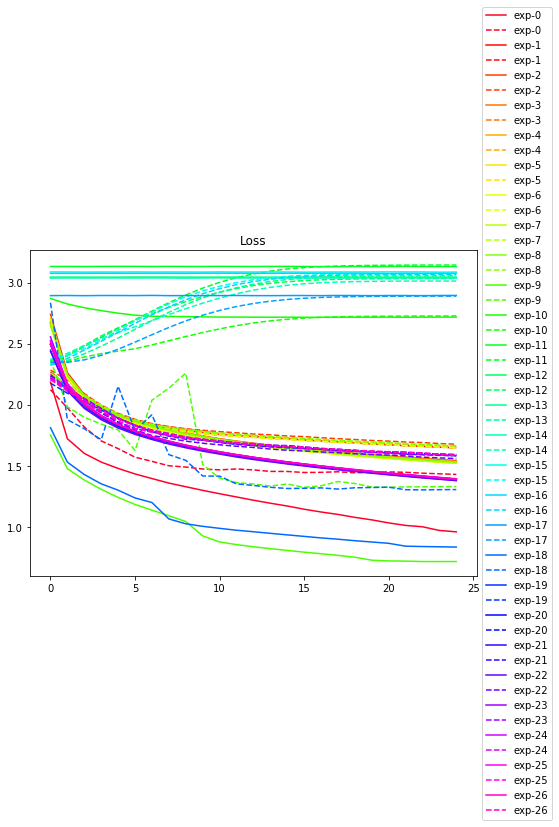

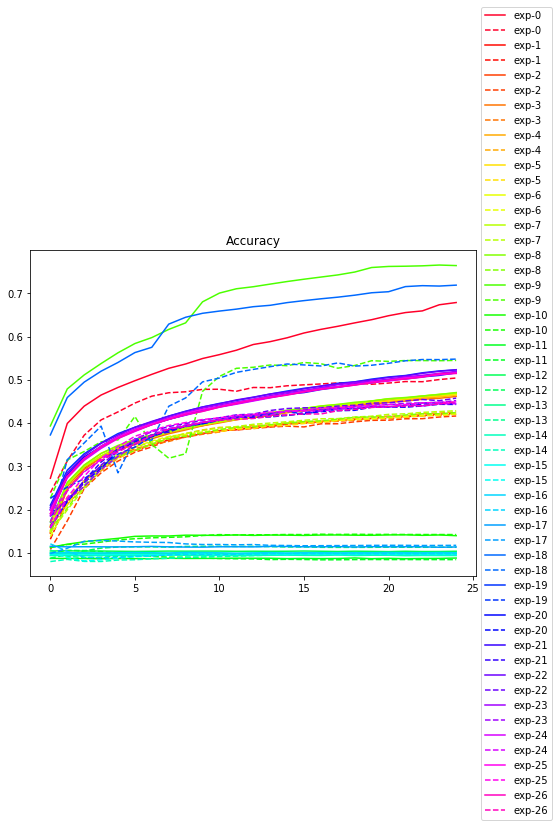

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()